In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dhaka_Rent.csv")

In [3]:
df.head(10)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [4]:
df.shape

(60, 2)

Text(0.5, 1.0, 'Dhaka Area vs Rent')

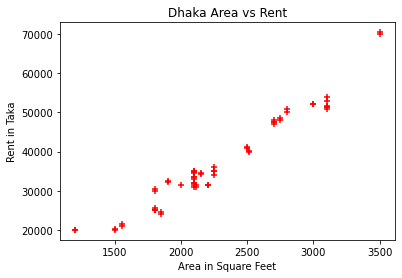

In [5]:
plt.scatter(df.area, df.rent, color='red', marker='+')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent in Taka')
plt.title('Dhaka Area vs Rent')

In [6]:
df1 = df.copy()


In [7]:
df1.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [8]:
x = df1.drop('rent', axis=1) # x always be in 2 dimension  # axis=1 means column, 0 means row(default value)
y = df1[['rent']]  # y can be both in 1 and 2 dimension
y = df1['rent'] # 1 dimension
y = df1[['rent']] # 2 dimension - 2 square brakets

In [9]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [10]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [11]:
x.mean()

area    2289.0
dtype: float64

In [12]:
y.mean()

rent    37269.166667
dtype: float64

## Model Selection - Train and Test Split

Train vs Test - Data Split - 75% vs 25%

In [13]:
from sklearn.model_selection import train_test_split

approach 1

In [14]:
# train, test = train_test_split(df1, test_size=.25) # test = 25%, train = 75%

In [15]:
train, test = train_test_split(df1, test_size=.25, random_state=1) # test = 25%, train = 75%, here random_state=1 fixed the split data for that number, so it wont change later

In [16]:
df1.shape

(60, 2)

In [17]:
train.shape

(45, 2)

In [18]:
test.shape

(15, 2)

Better Approach 2

In [19]:
xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size=.25, random_state=1) # test = 25%, train = 75%, here random_state=1(can be any number) fixed the split data for that number, so it wont change later

In [33]:
#  df1[0:45] for  fixed random state
#   x[0:45] for  fixed random state
#   y[45:60] for  fixed random state


,rent
45,51000
46,30000
47,21500
48,25500
49,47500
50,31000
51,33000
52,70500
53,20100
54,51000


In [20]:
xtrain.head()

,area
36,1500
21,2100
10,2150
52,3500
19,2700


In [21]:
ytrain.head()

,rent
36,20200
21,33500
10,34500
52,70500
19,47000


## Model - Linear Regression 

sklearn - https://scikit-learn.org/stable/

Linear Regression - https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [22]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(xtrain,ytrain) # training the model

LinearRegression()

In [39]:
m = lr.coef_
m

array([[21.68780639]])

In [41]:
c= lr.intercept_
c

array([-12460.41329719])

prediction

In [43]:
yp = (m*1500) + c # prediction with formula
yp

array([[20071.29628379]])

In [44]:
yp = (m*2100) + c  # prediction with formula
yp

array([[33083.98011619]])

In [45]:
lr.predict([[2100]]) # direct prediction

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[33083.98011619]])

In [48]:
import warnings as wr
wr.filterwarnings('ignore')

In [49]:
lr.predict([[3500]]) # direct prediction

array([[63446.90905844]])

In [51]:
df1['predicted_rent'] = lr.predict(x)
df1.head(10)

,area,rent,predicted_rent
0,2000,31500,30915.199477
1,2100,35000,33083.980116
2,2500,41050,41759.102671
3,2250,36100,36337.151074
4,3000,52100,52603.005865
5,1900,32500,28746.418839
6,1500,20000,20071.296284
7,1850,24500,27662.028519
8,2700,48000,46096.663949
9,2100,31000,33083.980116


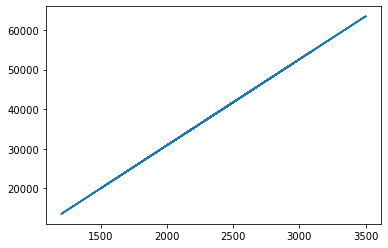

In [53]:
plt.plot(x, df1[['predicted_rent']])

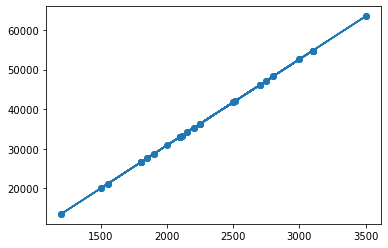

In [54]:
plt.plot(x, df1[['predicted_rent']])
plt.scatter(x, df1[['predicted_rent']])

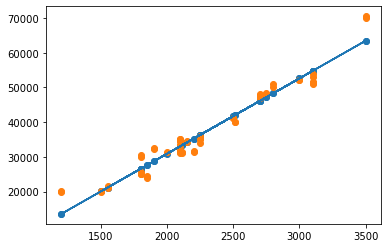

In [55]:
plt.plot(x, df1[['predicted_rent']]) # plt.plot(x.squeeze(), df1[['predicted_rent']]) - if theres any error

plt.scatter(x, df1[['predicted_rent']])
plt.scatter(x, df1[['rent']])

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [58]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mse

5816210.138113206

In [62]:
mae = mean_absolute_error(ytest, lr.predict(xtest))
mae

1828.0513339512015

In [63]:
lr.score(xtest,ytest)

0.9022409645314653

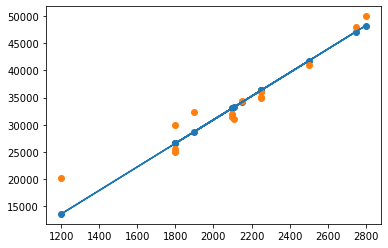

In [66]:
plt.plot(xtest, lr.predict(xtest)) # plt.plot(x.squeeze(), df1[['predicted_rent']]) - if theres any error
plt.scatter(xtest, lr.predict(xtest))
plt.scatter(xtest, ytest)